<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import scipy.stats
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

#### Read the dataset in the csv file from the URL


In [5]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [9]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task 1

#### 1.1 "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 0, 'Bloxplot')

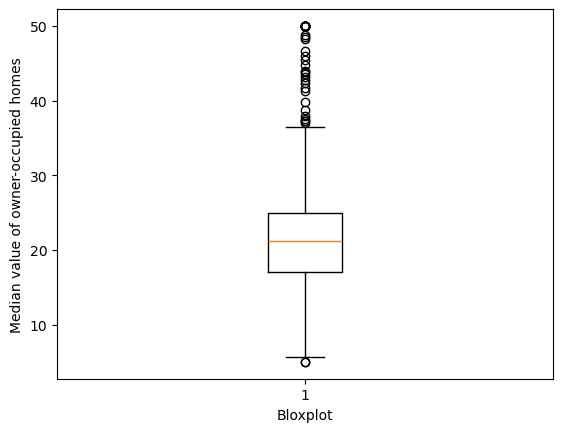

In [12]:
plt.boxplot("MEDV", data = boston_df)
plt.ylabel("Median value of owner-occupied homes", fontsize = 10)
plt.xlabel("Bloxplot", fontsize = 10)

#### 1.2 A histogram for the Charles river variable

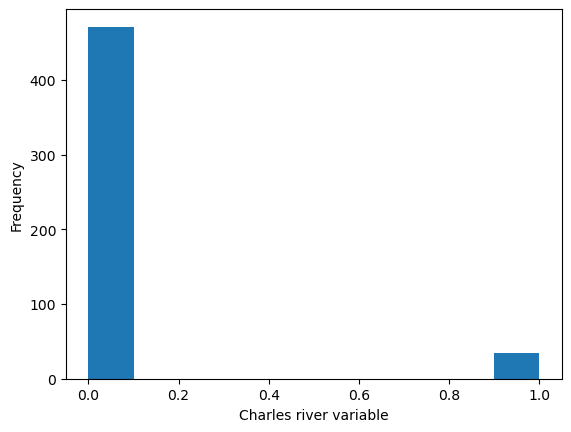

In [14]:
plt.hist(boston_df["CHAS"])
plt.xlabel("Charles river variable")
plt.ylabel("Frequency")
plt.show()

#### 1.3 A boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [16]:
#step 1 : Categorize into grps
for i in range(len(boston_df)):
    age = boston_df.loc[i, 'AGE']
    if age <= 30:
        boston_df.loc[i, 'Age_Group'] = "35 and younger"
    elif age < 70:
        boston_df.loc[i, 'Age_Group'] = "Between 35 and 70"
    else:
        boston_df.loc[i, 'Age_Group'] = "70 and older"

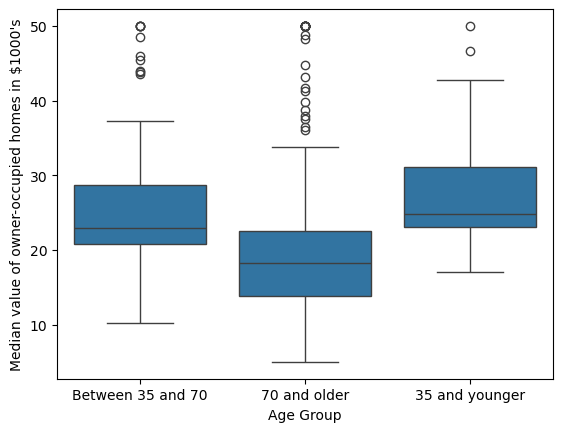

In [17]:
# Step 3: Create the box plot
sns.boxplot(x='Age_Group', y='MEDV', data=boston_df)
plt.xlabel("Age Group", fontsize=10)
plt.ylabel("Median value of owner-occupied homes in $1000's", fontsize=10)
plt.show()

#### 1.4 A scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

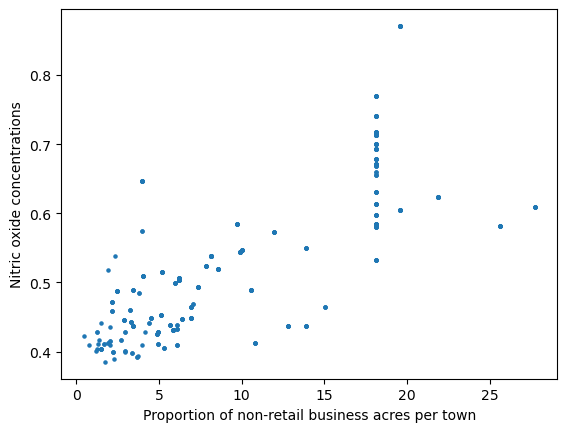

In [19]:
plt.scatter(x=boston_df["INDUS"], y=boston_df["NOX"],s=5)
plt.xlabel("Proportion of non-retail business acres per town")
plt.ylabel("Nitric oxide concentrations")
plt.show()

As observed in the scatter plot above, there appears to be a positive correlation between the proportion of non-retail business acres per town (INDUS) and nitric oxide concentrations (NOX). The points tend to show a linear relationship, where higher values of INDUS are associated with higher NOX levels.

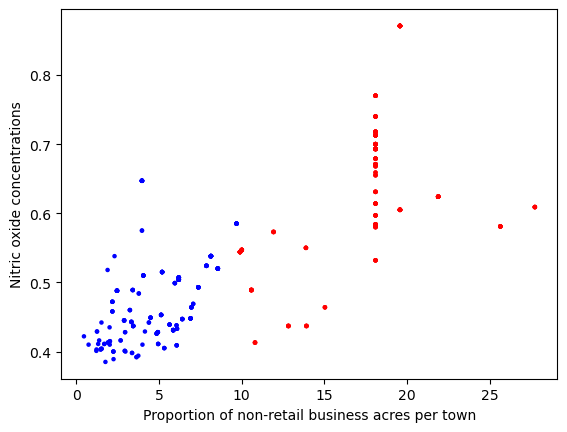

In [21]:
import matplotlib.pyplot as plt

# Example threshold to separate the colors
threshold = boston_df["INDUS"].median()

# Assign colors based on the threshold
colors = ["red" if indus > threshold else "blue" for indus in boston_df["INDUS"]]

# Create scatter plot with two colors
plt.scatter(x=boston_df["INDUS"], y=boston_df["NOX"], s=5, c=colors)
plt.xlabel("Proportion of non-retail business acres per town")
plt.ylabel("Nitric oxide concentrations")
plt.show()


#### 1.5 A histrogram for the pupil to teacher ratio variable

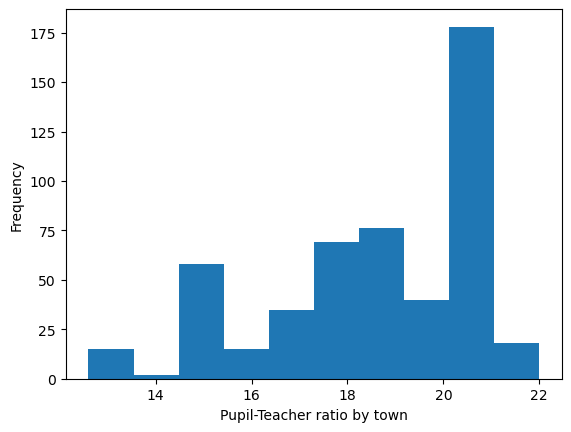

In [23]:
plt.hist(boston_df["PTRATIO"])
plt.xlabel("Pupil-Teacher ratio by town")
plt.ylabel("Frequency")
plt.show()

## Task 2

#### 2.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

H0: There is no significant difference in median value of house bounded by the Charles river

H1: There is a significant difference in median value of house bounded by the Charles river

In [28]:
#Group the MEDV data based on CHAS
houses_by_CHAS = boston_df[boston_df['CHAS'] == 1]['MEDV']
houses_not_by_CHAS = boston_df[boston_df['CHAS'] == 0]['MEDV']
scipy.stats.ttest_ind(houses_by_CHAS, houses_not_by_CHAS,equal_var=False)


TtestResult(statistic=3.113291312794837, pvalue=0.0035671700981375174, df=36.876408797611994)

Conclusion: The null hypothesis is rejected because the p-value is less than the alpha value of 0.05. This indicates there is a statistically significant difference in the median value of houses bounded by the Charles River compared to those not bounded by the river.

#### 2.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H0: µ1=µ2=µ3

H1: At least one mean is different

In [32]:
# Group 'MEDV' values by 'Age_Group' and extract lists
age_group_data = boston_df.groupby('Age_Group')['MEDV'].apply(list)

# Unpack the lists into separate arguments for the ANOVA test
age_group_1 = age_group_data['35 and younger']
age_group_2 = age_group_data['Between 35 and 70']
age_group_3 = age_group_data['70 and older']

scipy.stats.f_oneway(age_group_1, age_group_2, age_group_3)

F_onewayResult(statistic=34.249179272635395, pvalue=1.135217093487225e-14)

Conclusion: The null hypothesis is rejected because the p-value is less than the alpha value of 0.05. This indicates there a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

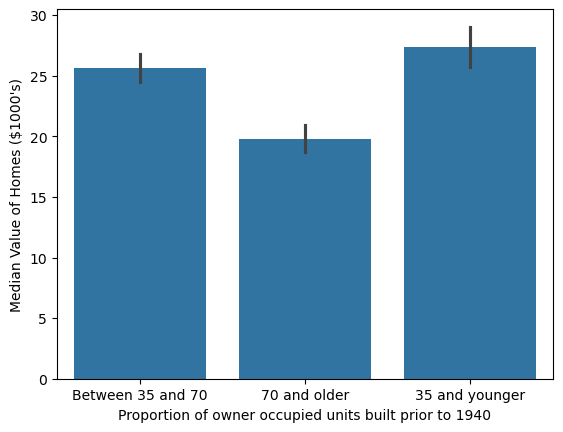

In [34]:
sns.barplot(x='Age_Group', y='MEDV', data=boston_df,)
plt.xlabel("Proportion of owner occupied units built prior to 1940", fontsize=10)
plt.ylabel("Median Value of Homes ($1000's)", fontsize=10)
plt.show()

#### 2.3 Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town (Pearson Correlation)

H0: There is no linear relationship between the proportion of non-retail business acres per town and nitric oxide concentrations

H1: There is a linear relationship between the proportion of non-retail business acres per town and nitric oxide concentrationsThere is no linear relationship between the proportion of non-retail business acres per town and nitric oxide concentrations

In [37]:
scipy.stats.pearsonr(boston_df["INDUS"], boston_df["NOX"])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

Conclusion: The null hypothesis is rejected because the p-value is less than the alpha value of 0.05. This indicate statistically significant evidence to suggest a strong positive linear relationship between the proportion of non-retail business acres per town (INDUS) and nitric oxide concentrations (NOX).

#### 2.4 Impact of an additional weighted distance to the five Boston employment centres (DIS) on the median value of owner occupied homes(MEDV) (Regression analysis)

H0: The weighted distance to the five Boston employment centers (DIS) has no effect on the median value of owner-occupied homes (MEDV) (H0=0)

H1: The weighted distance to the five Boston employment centers (DIS) has a effect on the median value of owner-occupied homes (MEDV) (H0 not= 0)

In [41]:
# Assuming boston_df is your DataFrame
X = boston_df["DIS"]
y = boston_df["MEDV"]

# Add a constant term to the predictor
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        00:47:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: The null hypothesis is rejected because the p-value(P>|t|) 0.000 is less than the alpha value of 0.05. This indicates that there is a statistically significant positive impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes, with a coefficient of 1.0916.